In [ ]:
!pip install ktrain

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
data_train = pd.read_excel('train.xlsx', dtype = str)

In [ ]:
data_test = pd.read_excel('test.xlsx', dtype = str)

In [ ]:
print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

Size of train dataset:  (25000, 2)
Size of test dataset:  (25000, 2)


In [ ]:
data_train

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg
...,...,...
24995,Everyone plays their part pretty well in this ...,pos
24996,It happened with Assault on Prescient 13 in 20...,neg
24997,My God. This movie was awful. I can't complain...,neg
24998,"When I first popped in Happy Birthday to Me, I...",neg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


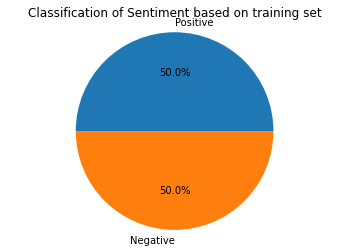

In [ ]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [[data_train[data_train.Sentiment == 'pos'].shape[0]], [data_train[data_train.Sentiment == 'neg'].shape[0]]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Classification of Sentiment based on training set')

plt.show()

In [ ]:
data_test

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg
...,...,...
24995,This fanciful horror flick has Vincent Price p...,neg
24996,"The Intruder (L'Intrus), a film directed by Fr...",pos
24997,Holy crap. This was the worst film I have seen...,neg
24998,Clocking in at an interminable three hours and...,neg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


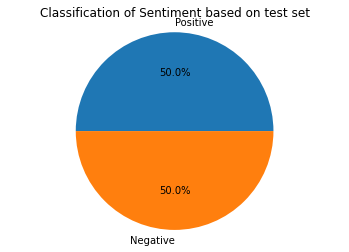

In [ ]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [[data_test[data_test.Sentiment == 'pos'].shape[0]], [data_test[data_test.Sentiment == 'neg'].shape[0]]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Classification of Sentiment based on test set')

plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'Reviews',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)

predictor = ktrain.get_predictor(learner.model, preproc)



begin training using onecycle policy with max lr of 2e-05...
4167/4167 [==============================] - 5500s 1s/step - loss: 0.2512 - accuracy: 0.8955 - val_loss: 0.1033 - val_accuracy: 0.9658


In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

In [ ]:
score = model.evaluate(x=X_test, y=y_test)
score[1]

782/782 [==============================] - 1113s 1s/step - loss: 0.1033 - accuracy: 0.9658


0.9657999873161316